## Самостоятельный проект. Обучение с учителем: качество модели

### Шаг 1. Загрузка данных

#### Импорты

In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Функции

In [89]:
def analyze_dataframe(df):
    # Установка формата отображения чисел с плавающей точкой
    pd.options.display.float_format = '{:,.1f}'.format

    # Вывести первые несколько строк (по умолчанию 5)
    display("Первые несколько строк:")
    display(df.head())

    # Вывести общую информацию о датафрейме
    display("Информация о датафрейме:")
    display(df.info())

    # Вывести статистическое описание числовых столбцов
    display("Статистическое описание числовых столбцов:")
    display(df.describe())

    # Проверить наличие дубликатов и вывести их количество
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        display(f"Количество дубликатов: {duplicate_count}")
    else:
        display("Дубликатов не найдено.")
    
    # Создание DataFrame с процентами пропущенных значений
    missing_data_percent = pd.DataFrame(round(df.isna().mean() * 100, 1))

    # Вывести стилизованный DataFrame с процентами пропущенных значений
    display("Проценты пропущенных значений:")
    display(missing_data_percent)

In [90]:
def plot_data_distribution(data):
    """
    Визуализирует распределение признаков в DataFrame.
    
    Функция проходит по всем столбцам датафрейма и строит графики распределения.
    Для категориальных признаков строит countplot, для количественных - гистограмму и boxplot.
    Поворачивает метки, если в категориальном признаке больше 4 уникальных категорий.
    
    Параметры:
    data (DataFrame): Датафрейм, для которого необходимо визуализировать распределения.
    
    Возвращает:
    None
    """
    
    # Настройки внешнего вида графиков
    plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})

    # Проходим по всем столбцам датафрейма
    for column in data.columns:
        if column != 'id':  # Пропускаем столбец id
            if data[column].dtype == 'object':  # Категориальные данные
                plt.figure(figsize=(10, 4))
                sns.countplot(x=column, data=data)
                plt.title(f'Распределение по {column}')
                
                # Поворот меток при необходимости
                if len(data[column].unique()) > 4:
                    plt.xticks(rotation=45)
                
                plt.show()
            else:  # Количественные данные
                fig, ax = plt.subplots(1, 2, figsize=(15, 5))
                sns.histplot(data[column], kde=True, bins=50, ax=ax[0])
                ax[0].set_title(f'Гистограмма {column}')
                sns.boxplot(x=data[column], ax=ax[1])
                ax[1].set_title(f'Boxplot {column}')
                plt.show()

#### Загрузка данных

In [91]:
try:
    market_file_df = pd.read_csv('market_file.csv')
    print("Успешно загружен файл 'market_file.csv'")
    
    market_money_df = pd.read_csv('market_money.csv')
    print("Успешно загружен файл 'market_money.csv'")
    
    market_time_df = pd.read_csv('market_time.csv')
    print("Успешно загружен файл 'market_time.csv'")
    
    money_df = pd.read_csv('money.csv', sep=';', decimal=',')
    print("Успешно загружен файл 'money.csv'")
    
except FileNotFoundError:
    print("Ошибка: Файл не найден.")
except pd.errors.EmptyDataError:
    print("Ошибка: Файл не содержит данных.")
except pd.errors.ParserError:
    print("Ошибка: Не удалось разобрать файл CSV.")
except Exception as e:
    print(f"Произошла ошибка: {str(e)}")

Успешно загружен файл 'market_file.csv'
Успешно загружен файл 'market_money.csv'
Успешно загружен файл 'market_time.csv'
Успешно загружен файл 'money.csv'


#### Просмотр `market_file_df`

In [92]:
analyze_dataframe(market_file_df)

'Первые несколько строк:'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.8,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.1,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,1.0,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.9,Товары для детей,3,2,3,2


'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

'Статистическое описание числовых столбцов:'

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,"1,300.0","1,300.0","1,300.0","1,300.0","1,300.0","1,300.0","1,300.0","1,300.0","1,300.0"
mean,"215,997.5",4.3,4.0,601.9,0.3,3.3,2.8,4.2,8.2
std,375.4,1.0,0.7,249.9,0.2,1.4,2.0,2.0,4.0
min,"215,348.0",0.9,3.0,110.0,0.0,1.0,0.0,0.0,1.0
25%,"215,672.8",3.7,4.0,405.5,0.2,2.0,1.0,3.0,5.0
50%,"215,997.5",4.2,4.0,606.0,0.2,3.0,3.0,4.0,8.0
75%,"216,322.2",4.9,4.0,806.0,0.3,4.0,4.0,6.0,11.0
max,"216,647.0",6.6,5.0,"1,079.0",1.0,6.0,10.0,9.0,20.0


'Дубликатов не найдено.'

'Проценты пропущенных значений:'

,0
id,0.0
Покупательская активность,0.0
Тип сервиса,0.0
Разрешить сообщать,0.0
Маркет_актив_6_мес,0.0
Маркет_актив_тек_мес,0.0
Длительность,0.0
Акционные_покупки,0.0
Популярная_категория,0.0
Средний_просмотр_категорий_за_визит,0.0


Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении соответсвует описанию 

#### Просмотр `market_money_df`

In [93]:
analyze_dataframe(market_money_df)

'Первые несколько строк:'

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,"3,293.1"
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,"4,472.0"
4,215349,текущий_месяц,"4,971.6"


'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

'Статистическое описание числовых столбцов:'

,id,Выручка
count,"3,900.0","3,900.0"
mean,"215,997.5","5,025.7"
std,375.3,"1,777.7"
min,"215,348.0",0.0
25%,"215,672.8","4,590.1"
50%,"215,997.5","4,957.5"
75%,"216,322.2","5,363.0"
max,"216,647.0","106,862.2"


'Дубликатов не найдено.'

'Проценты пропущенных значений:'

,0
id,0.0
Период,0.0
Выручка,0.0


Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом соответсвует описанию, но в данных есть период `преппредыдущий месяц` возможно это неявный дубликат.

#### Просмотр `market_time_df`

In [94]:
analyze_dataframe(market_time_df)

'Первые несколько строк:'

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

'Статистическое описание числовых столбцов:'

,id,минут
count,"2,600.0","2,600.0"
mean,"215,997.5",13.3
std,375.3,4.1
min,"215,348.0",4.0
25%,"215,672.8",10.0
50%,"215,997.5",13.0
75%,"216,322.2",16.0
max,"216,647.0",23.0


'Дубликатов не найдено.'

'Проценты пропущенных значений:'

,0
id,0.0
Период,0.0
минут,0.0


Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода соответсвует описанию

#### Просмотр `money_df`

In [95]:
analyze_dataframe(money_df)

'Первые несколько строк:'

,id,Прибыль
0,215348,1.0
1,215349,4.2
2,215350,3.1
3,215351,4.9
4,215352,4.2


'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

'Статистическое описание числовых столбцов:'

,id,Прибыль
count,"1,300.0","1,300.0"
mean,"215,997.5",4.0
std,375.4,1.0
min,"215,348.0",0.9
25%,"215,672.8",3.3
50%,"215,997.5",4.0
75%,"216,322.2",4.7
max,"216,647.0",7.4


'Дубликатов не найдено.'

'Проценты пропущенных значений:'

,0
id,0.0
Прибыль,0.0


Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю
соответсвует описанию

### Шаг 2. Предобработка данных

#### Исправление ошибок в данных

In [96]:
market_file_df['Тип сервиса'] = market_file_df['Тип сервиса'].replace(to_replace={'стандартт':'стандарт'})

#### Поиск явных дубликатов

In [97]:
datasets = {
    'market_file_df': market_file_df,
    'market_money_df': market_money_df,
    'market_time_df': market_time_df,
    'money_df': money_df
}
for name, dataset in datasets.items():
    print()
    print(f'Датасет {name}')
    print(dataset.isna().sum())
    print('Количество дубликатов:', dataset.duplicated().sum())
    if dataset.duplicated().sum() > 0:
        duplicates = dataset[dataset.duplicated()]
        print("Дублирующиеся строки:")
        print(duplicates)
        print()


Датасет market_file_df
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64
Количество дубликатов: 0

Датасет market_money_df
id         0
Период     0
Выручка    0
dtype: int64
Количество дубликатов: 0

Датасет market_time_df
id        0
Период    0
минут     0
dtype: int64
Количество дубликатов: 0

Датасет money_df
id         0
Прибыль    0
dtype: int64
Количество дубликатов: 0


Явные дубликаты отсутствуют 

#### Поиск неявных дубликатов

In [98]:
# нас интересует дф market_money в нем мы увидели значение признака отсутствующее в описании
market_money_df['Период'].value_counts()
# предыдущий_месяц это данные за позапрошлый месяц так как у одного id наблюдаются 3 записи с разными выручками. 

Период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

#### Проверка типов данных

Как видно из просмотра дф типы таблиц определены коректно, по крайней мере пока нам нет необходимости их менять. 

#### Обработка пропущенных значений

Пропущенных значений не выявлено 

### Шаг 3. Исследовательский анализ данных

#### Проведите исследовательский анализ данных из каждой таблицы

##### Исследовательский анализ данных market_file_df

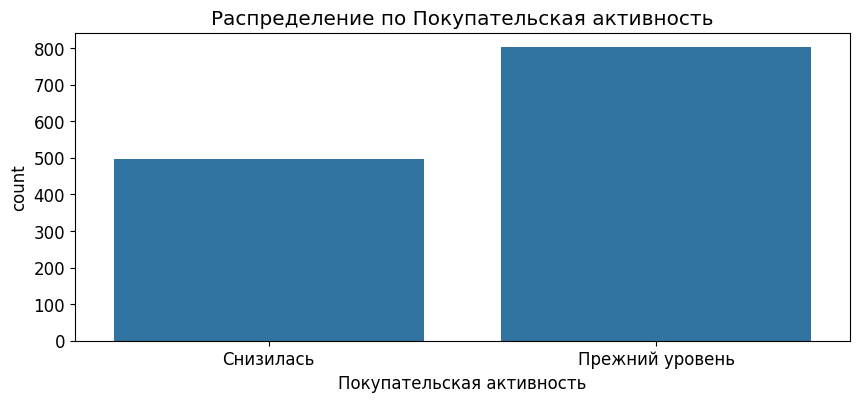

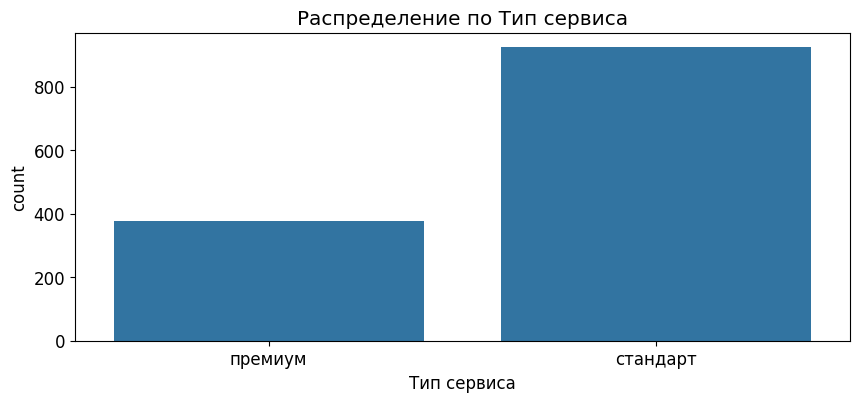

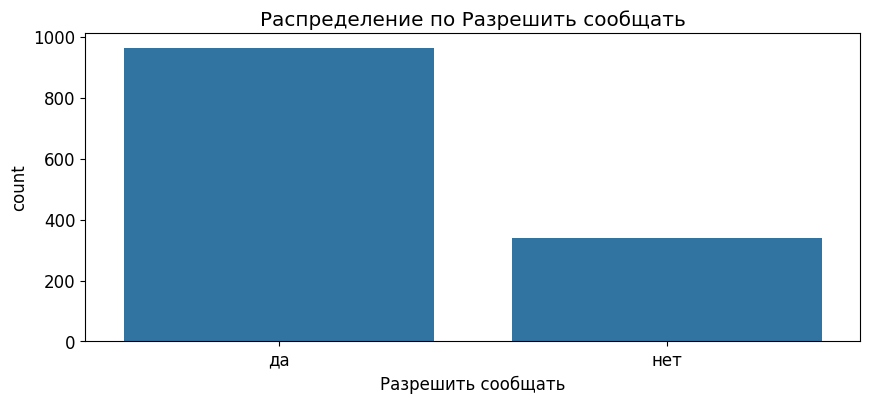

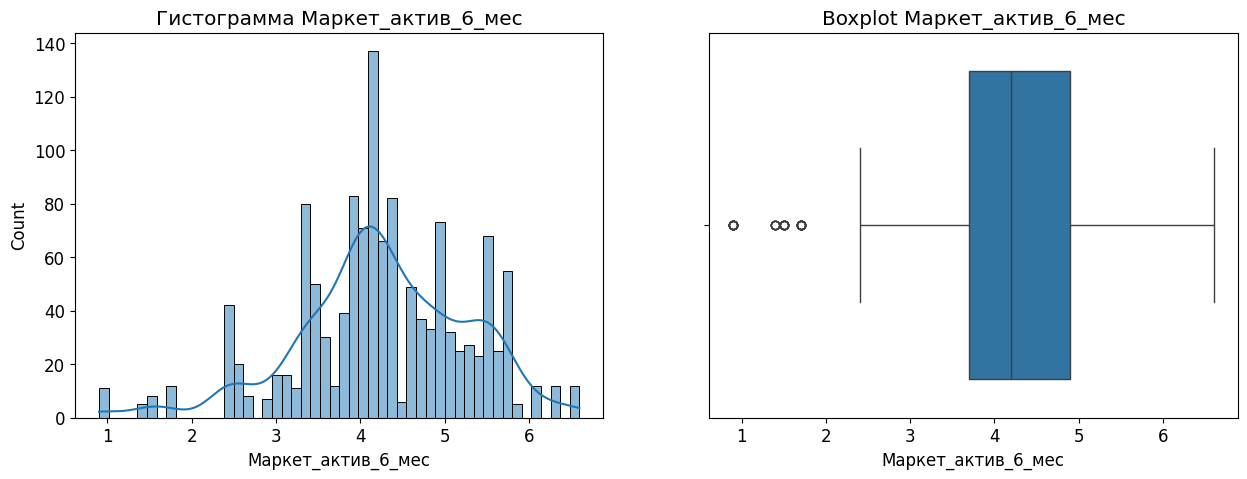

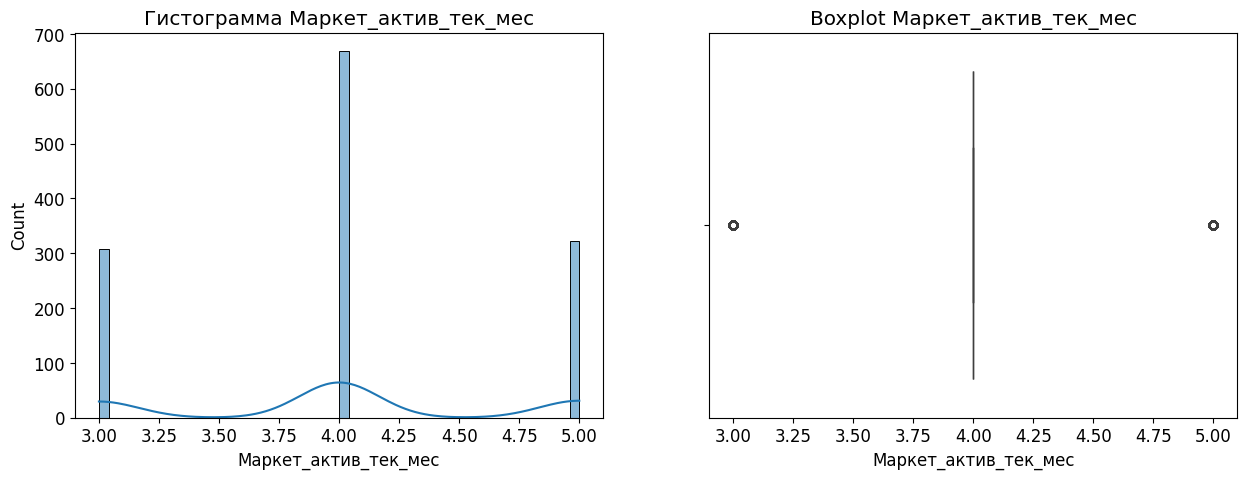

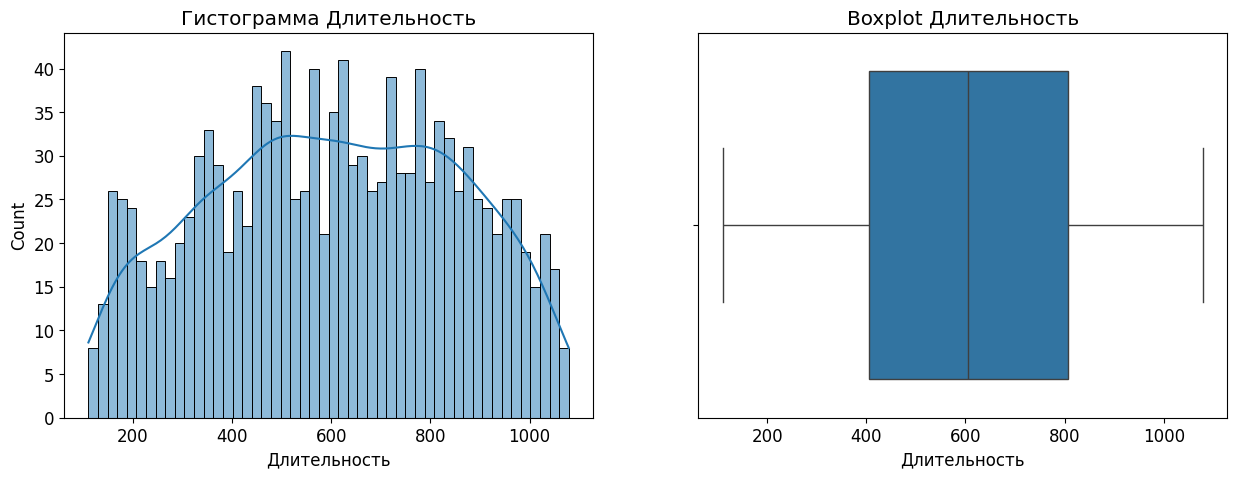

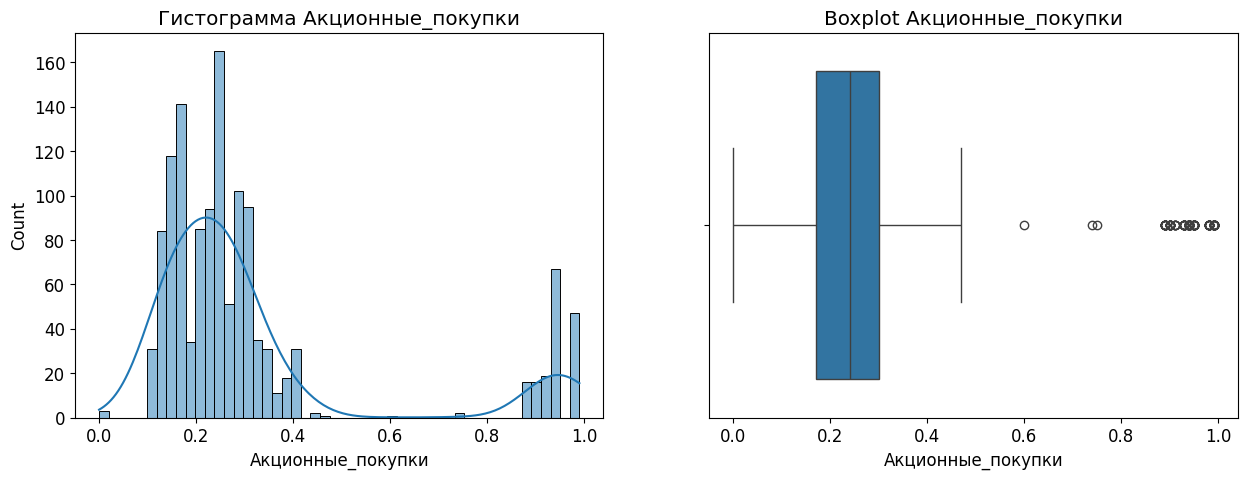

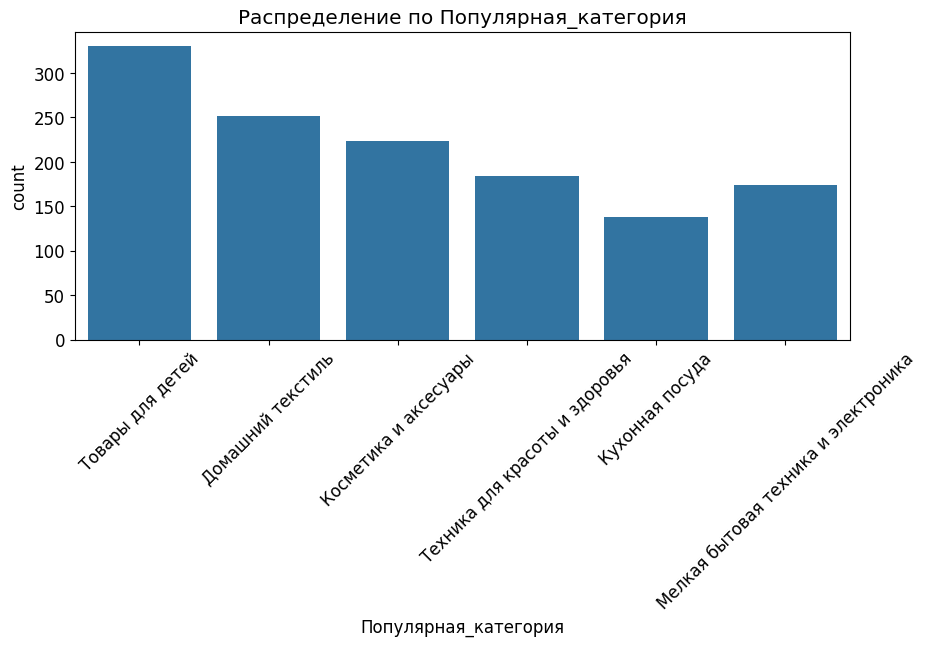

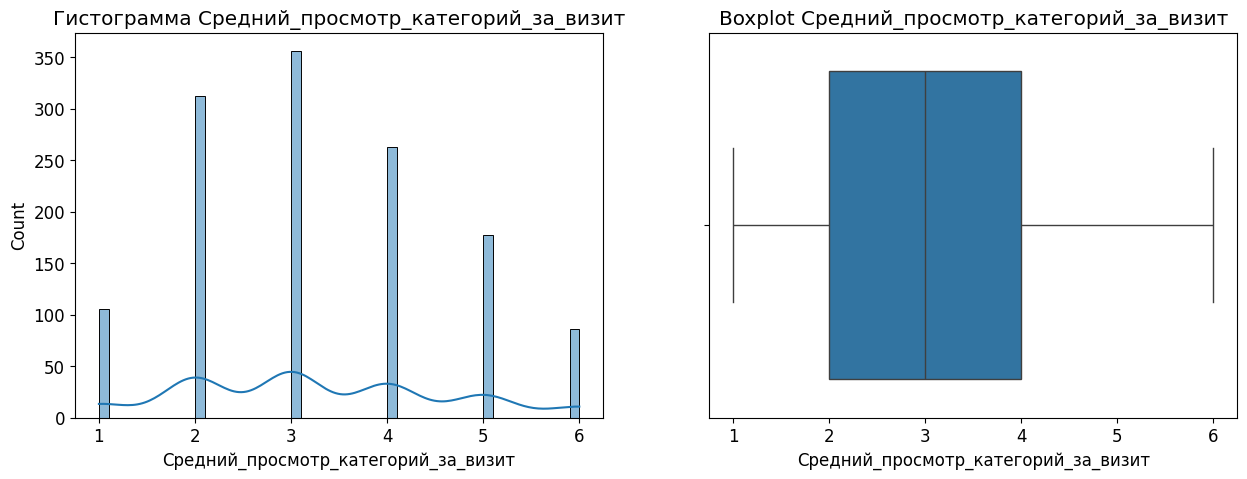

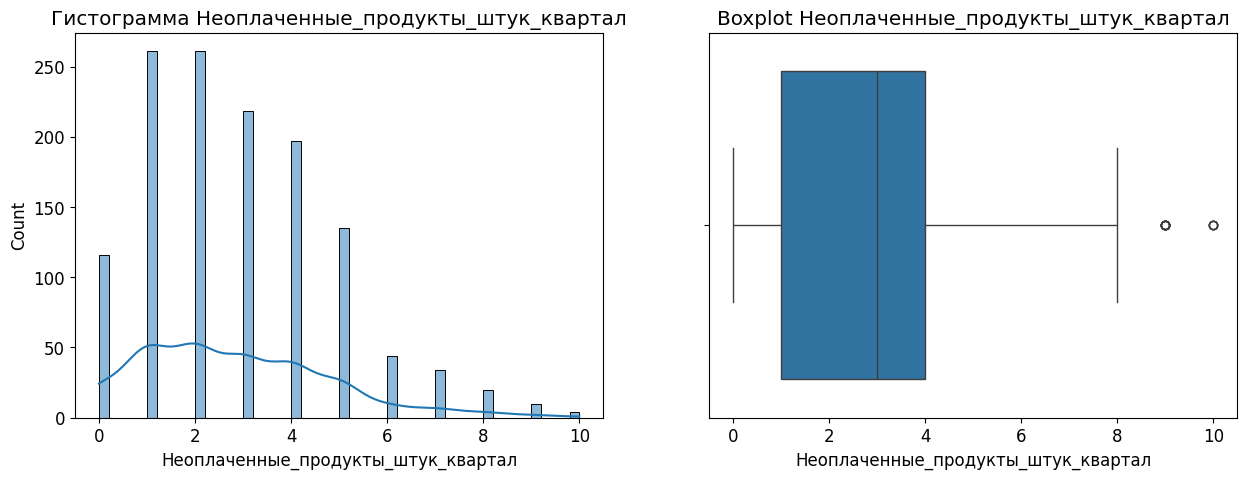

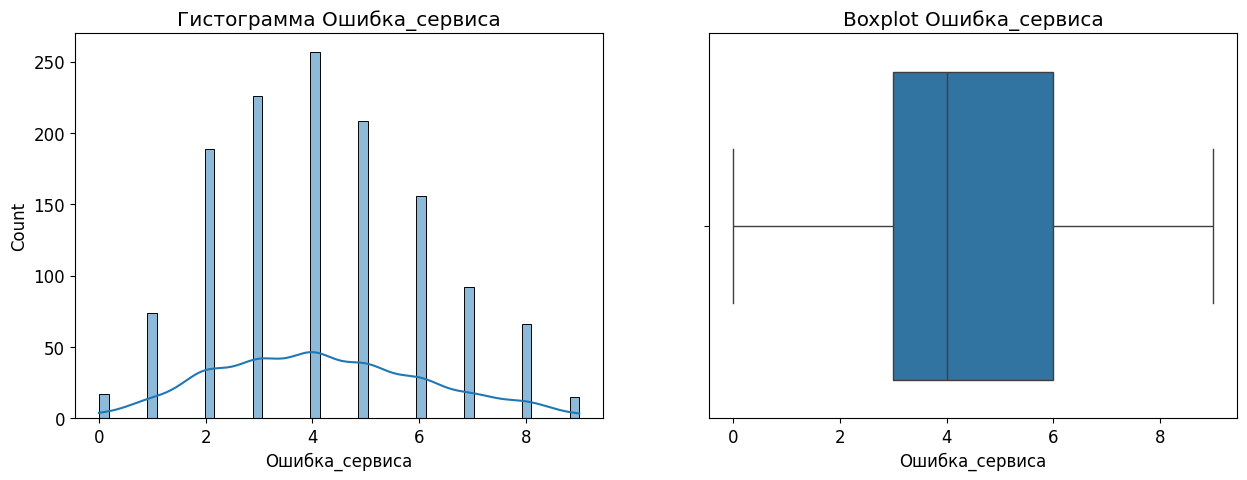

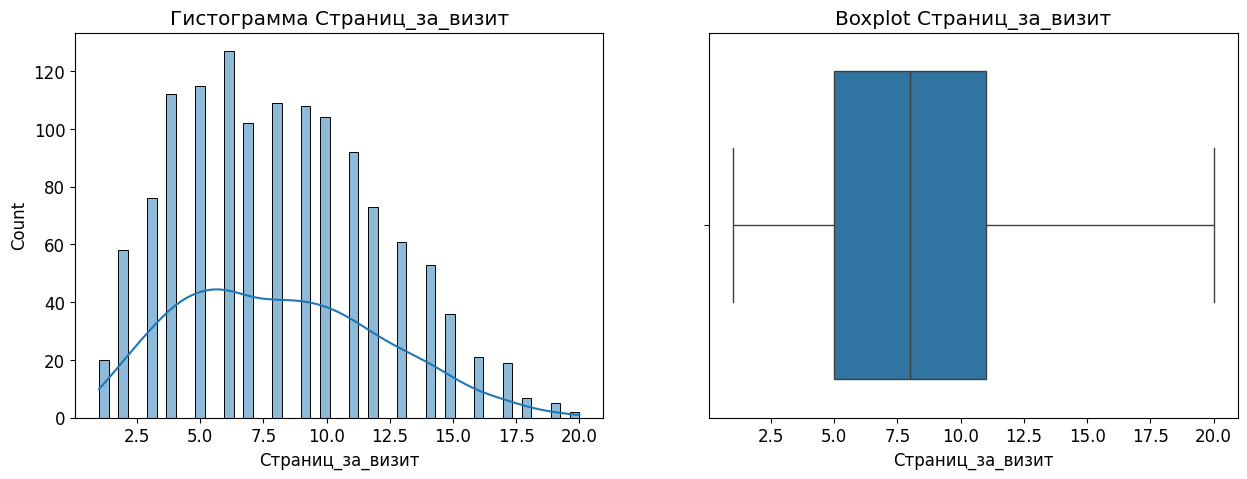

In [99]:
plot_data_distribution(market_file_df)

###### Вывод

Графики хорошо иллюстрируют данные, на данный момент нас интересуют пользователи, с активностью не менее трех месяцев.
`Маркетинговая активность 6 мес` признак по которому мы отберем пользователей. 

Данный ДФ представлен разными наборами данных с разным типом распределений, боксплот указывает на некоторые выбросы,
в дальнейшем, если потребуется мы детальнее на них взглянем. 

##### Исследовательский анализ данных market_money_df

Выручка имееты выброс нам лучше его удалить. 

In [106]:
market_money_df = market_money_df[market_money_df['Выручка'] <= 100000]
market_money_df = market_money_df[market_money_df['Выручка'] >= 100]

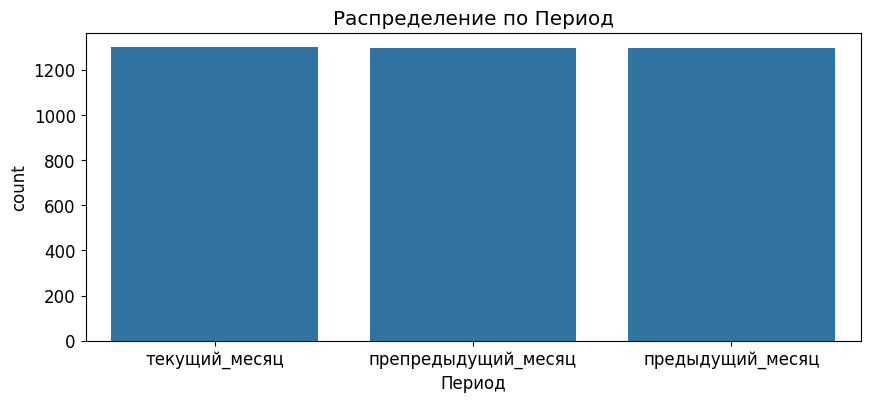

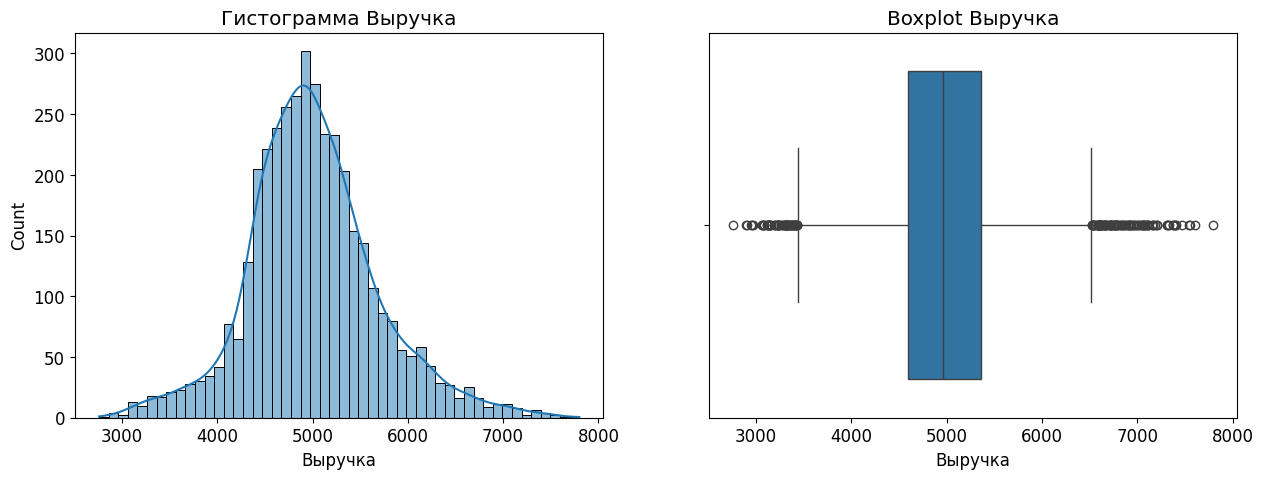

In [107]:
plot_data_distribution(market_money_df)

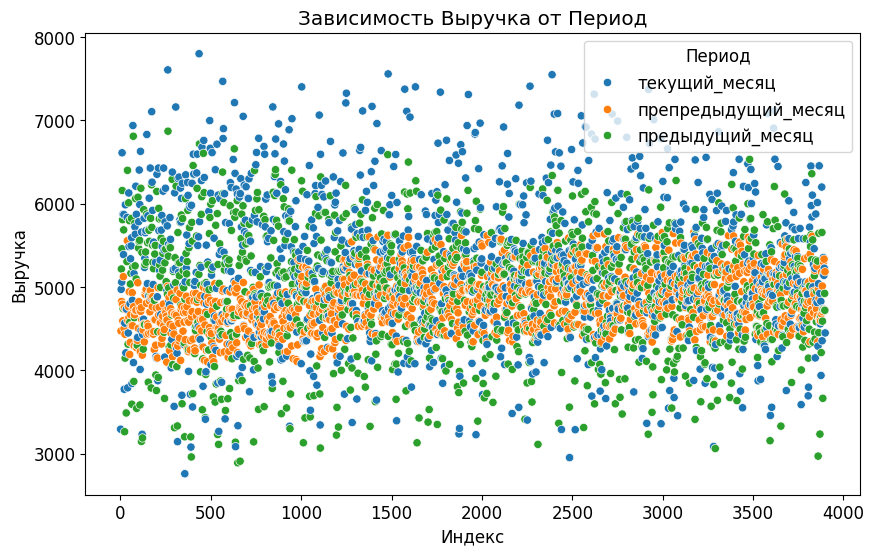

In [110]:
feature = 'Выручка'
time_period = 'Период'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=market_money_df.index, y=market_money_df[feature], hue=market_money_df[time_period])
plt.title(f'Зависимость {feature} от {time_period}')
plt.xlabel('Индекс')  
plt.ylabel(feature)
plt.show()

###### Вывод

Мы наблюдаем нормальное распределение выручки с небольшим хвостом вправо так же тут мы можем взять id пользователей так как у нас есть активность за текущий месяц прошлый и позапрошлый.
Нужно только убедиться что выручки по месяцам сопоставимы.  

##### Исследовательский анализ данных market_time_df

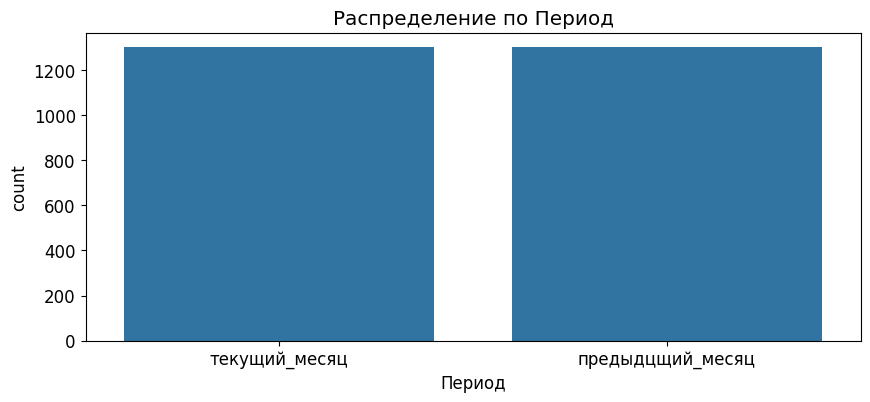

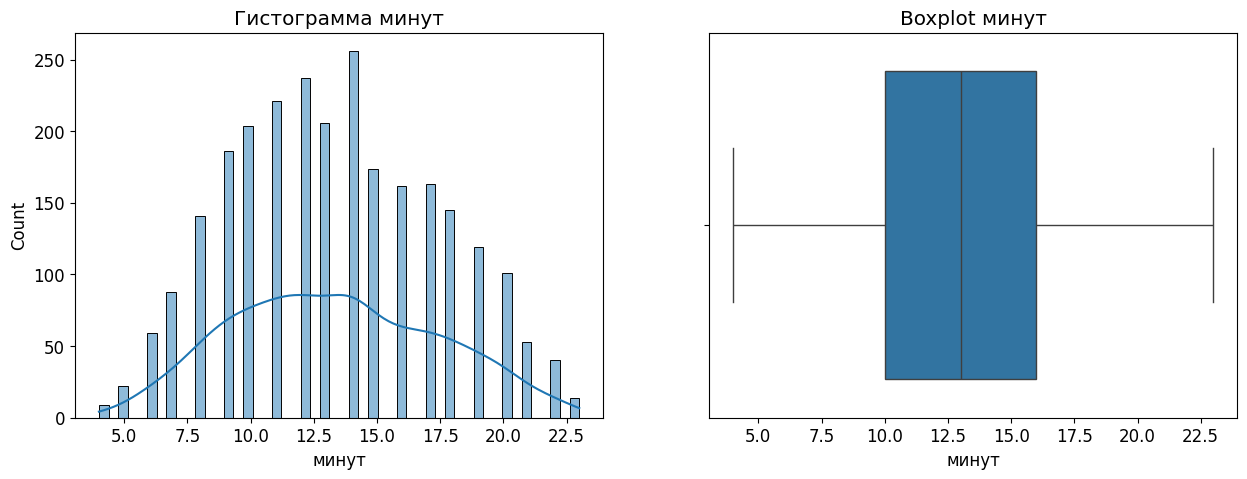

In [111]:
plot_data_distribution(market_time_df)

###### Вывод

Нормальное распределение без выбросов. У нас в распоряжении есть данные о длине сессии за текущий месяц и предыдущий. Возможно их можно будет использовать, чтобы оценить продолжительность сессии и понять данные в текущем месяце представляют целый месяц, а значит они нам подходят или нет.

##### Исследовательский анализ данных money_df

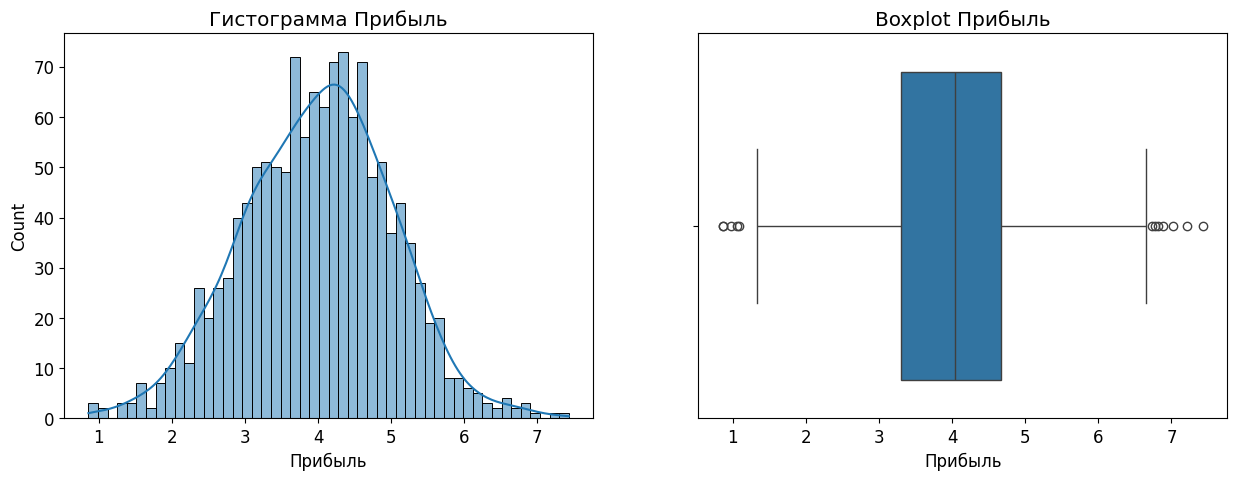

In [112]:
plot_data_distribution(money_df)

###### Вывод

Нормально распределенные данные по прибыли магазина. Боксплот указывает на экстремально высокие значения, но я думаю что мы можем их оставить. Не похоже, что это выбросы. 

##### Отбор клиентов

Возможно самым простым вариантом будет отобрать по ДФ money - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

In [116]:
three_month_clients = money_df[money_df['Прибыль'] > 0]
three_month_clients.describe()

,id,Прибыль
count,"1,300.0","1,300.0"
mean,"215,997.5",4.0
std,375.4,1.0
min,"215,348.0",0.9
25%,"215,672.8",3.3
50%,"215,997.5",4.0
75%,"216,322.2",4.7
max,"216,647.0",7.4
